In [145]:
import requests
from bs4 import BeautifulSoup
import csv

location = "https://pusatdata.kontan.co.id/makroekonomi/kurs_bi"
req = requests.get(location)
soup = BeautifulSoup(req.text, 'html.parser')
scripts = soup.find_all("script")

print soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "https://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
 <html xmlns="https://www.w3.org/1999/xhtml"> <head> <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <title>Data Kurs Bank Indonesia - Kontan Online</title> <meta content="Bank Indonesia mempunyai satu tujuan tunggal yakni mencapai dan menjaga kestabilan nilai rupiah." name="description"/> <meta content="reksadana, suku bunga deposito, unitlink, data ekonomi makro, data industri, data sekuritas dan kurs pajak" name="keywords"/> <link href="https://assets.kontan.co.id/alldesign/images/logo_kontan.ico" rel="shortcut icon"/> <meta content="WtA48NW8orIYhjM1jMJNifZ7bJ_fwA5OzXkIbgiKnSg" name="google-site-verification"/> <!-- DEFAULT KONTAN CSS --> <!-- EVOO --> <!--<link type="text/css" rel="stylesheet" href="https://assets.kontan.co.id/min/b=kontan/evoo/css&amp;f=style.css,bodi.css" />--> <!-- ICOOL --> <link href="https://fonts.googleapis.com/css?f

In [146]:
ranklist = soup.select('tr')
data = []
i = 0

for row in ranklist[1:]:
    index = i
    tanggal   = row.select('td')[0].text
    kurs_jual = row.select('td')[1].text
    kurs_tengah = row.select('td')[2].text
    kurs_beli = row.select('td')[3].text
    print tanggal
    print kurs_jual
    print kurs_tengah
    print kurs_beli
    
    data.append([index, tanggal, kurs_jual, kurs_tengah, kurs_beli])
    print data
    i=i+1
with open('databi.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(data)

2018-07-11
14.463
14.391
14.319
[[0, u'2018-07-11', u'14.463', u'14.391', u'14.319']]
2018-07-10
14.398
14.326
14.254
[[0, u'2018-07-11', u'14.463', u'14.391', u'14.319'], [1, u'2018-07-10', u'14.398', u'14.326', u'14.254']]
2018-07-09
14.404
14.332
14.260
[[0, u'2018-07-11', u'14.463', u'14.391', u'14.319'], [1, u'2018-07-10', u'14.398', u'14.326', u'14.254'], [2, u'2018-07-09', u'14.404', u'14.332', u'14.260']]
2018-07-05
14.459
14.387
14.315
[[0, u'2018-07-11', u'14.463', u'14.391', u'14.319'], [1, u'2018-07-10', u'14.398', u'14.326', u'14.254'], [2, u'2018-07-09', u'14.404', u'14.332', u'14.260'], [3, u'2018-07-05', u'14.459', u'14.387', u'14.315']]
2018-07-04
14.415
14.343
14.271
[[0, u'2018-07-11', u'14.463', u'14.391', u'14.319'], [1, u'2018-07-10', u'14.398', u'14.326', u'14.254'], [2, u'2018-07-09', u'14.404', u'14.332', u'14.260'], [3, u'2018-07-05', u'14.459', u'14.387', u'14.315'], [4, u'2018-07-04', u'14.415', u'14.343', u'14.271']]
2018-07-03
14.490
14.418
14.346
[[0, u'2

In [147]:
import pandas as pd

kurs = pd.read_csv('databi.csv', names=['index', 'tanggal', 'kurs_jual', 'kurs_tengah', 'kurs_beli'])
kurs = kurs.sort_values(by=['index'],ascending=False)
kurs.head(16)

,index,tanggal,kurs_jual,kurs_tengah,kurs_beli
15,15,2018-06-19,13.972,13.902,13.832
14,14,2018-06-20,13.972,13.902,13.832
13,13,2018-06-21,14.160,14.090,14.020
12,12,2018-06-22,14.173,14.102,14.031
11,11,2018-06-25,14.176,14.105,14.034
10,10,2018-06-26,14.234,14.163,14.092
9,9,2018-06-27,14.234,14.163,14.092
8,8,2018-06-28,14.342,14.271,14.200
7,7,2018-06-29,14.476,14.404,14.332
6,6,2018-07-02,14.403,14.331,14.259


In [1]:
#

In [148]:
#Metode RNN

import tensorflow as tf
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

In [149]:
datax = np.array (kurs.iloc[:,[1]])
datax = datax.reshape(16)
print datax

['2018-06-19' '2018-06-20' '2018-06-21' '2018-06-22' '2018-06-25'
 '2018-06-26' '2018-06-27' '2018-06-28' '2018-06-29' '2018-07-02'
 '2018-07-03' '2018-07-04' '2018-07-05' '2018-07-09' '2018-07-10'
 '2018-07-11']


In [150]:
datay = np.array (kurs.iloc[:,[2]])
datay = datay.reshape(16)
print datay

[13.972 13.972 14.16  14.173 14.176 14.234 14.234 14.342 14.476 14.403
 14.49  14.415 14.459 14.404 14.398 14.463]


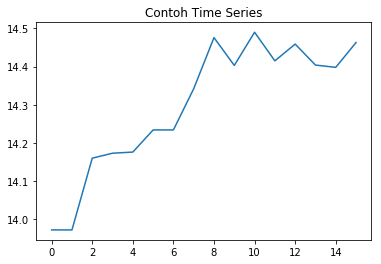

In [151]:
ts = pd.Series(datay)
plt.title('Contoh Time Series')
ts.plot()
plt.show()

In [169]:
TS = np.array(ts)
num_periods = 15
f_horizon = 1
print len(TS)

x_data = TS[:(len(TS)-(len(TS) % num_periods))]
x_batches = x_data.reshape(-1, 15, 1)

y_data = TS[1:(len(TS)-(len(TS) % num_periods))+f_horizon]
y_batches = y_data.reshape(-1, 15, 1)
print (len(x_batches))
print (x_batches.shape)
print (x_batches[0:2])

print (y_batches[0:1])
print (y_batches.shape)

16
1
(1, 15, 1)
[[[13.972]
  [13.972]
  [14.16 ]
  [14.173]
  [14.176]
  [14.234]
  [14.234]
  [14.342]
  [14.476]
  [14.403]
  [14.49 ]
  [14.415]
  [14.459]
  [14.404]
  [14.398]]]
[[[13.972]
  [14.16 ]
  [14.173]
  [14.176]
  [14.234]
  [14.234]
  [14.342]
  [14.476]
  [14.403]
  [14.49 ]
  [14.415]
  [14.459]
  [14.404]
  [14.398]
  [14.463]]]
(1, 15, 1)


In [170]:
def test_data(series, forecast, num_periods):
    test_x_setup = TS[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, 15, 1)
    testY = TS[-(num_periods):].reshape(-1, 15, 1)
    return testX, testY

X_test, Y_test = test_data(TS,f_horizon,num_periods)
print (X_test.shape)
print (X_test)

(1, 15, 1)
[[[13.972]
  [13.972]
  [14.16 ]
  [14.173]
  [14.176]
  [14.234]
  [14.234]
  [14.342]
  [14.476]
  [14.403]
  [14.49 ]
  [14.415]
  [14.459]
  [14.404]
  [14.398]]]


In [171]:
tf.reset_default_graph()

num_periods = 15
inputs = 1
hidden = 100
output = 1

X = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [172]:
epochs = 1000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, "\tMSE:", mse)
            
    y_pred = sess.run(outputs, feed_dict={X: X_test})
    print(y_pred)

(0, '\tMSE:', 4163.35)
(100, '\tMSE:', 86.46667)
(200, '\tMSE:', 26.739763)
(300, '\tMSE:', 2.7352362)
(400, '\tMSE:', 0.083004214)
(500, '\tMSE:', 0.01372043)
(600, '\tMSE:', 0.011030179)
(700, '\tMSE:', 0.009128438)
(800, '\tMSE:', 0.0071200104)
(900, '\tMSE:', 0.0057885274)
[[[13.972058]
  [14.160223]
  [14.1729  ]
  [14.175583]
  [14.236355]
  [14.232862]
  [14.342131]
  [14.481176]
  [14.394747]
  [14.493969]
  [14.431753]
  [14.432044]
  [14.433929]
  [14.42441 ]
  [14.416842]]]


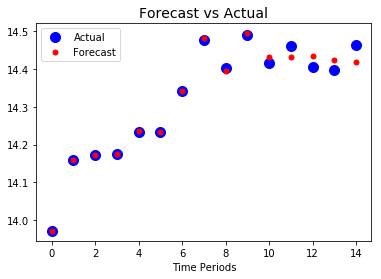

In [173]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=10, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")

plt.show()

(array([2., 0., 0., 3., 0., 2., 0., 1., 4., 4.]),
 array([13.972 , 14.0238, 14.0756, 14.1274, 14.1792, 14.231 , 14.2828,
        14.3346, 14.3864, 14.4382, 14.49  ]),
 <a list of 10 Patch objects>)

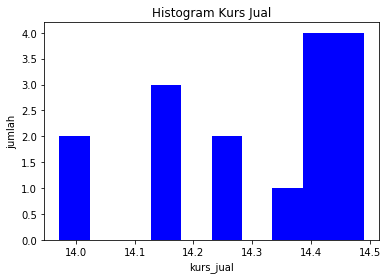

In [157]:
#Analisis EDA
#histogram kurs jual
plt.xlabel('kurs_jual')
plt.ylabel('jumlah')
plt.title('Histogram Kurs Jual')
plt.hist(kurs['kurs_jual'], facecolor='blue')

(array([2., 0., 0., 3., 0., 2., 0., 1., 4., 4.]),
 array([13.902 , 13.9536, 14.0052, 14.0568, 14.1084, 14.16  , 14.2116,
        14.2632, 14.3148, 14.3664, 14.418 ]),
 <a list of 10 Patch objects>)

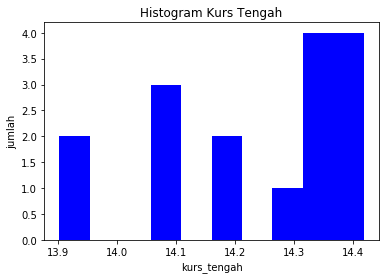

In [158]:
#histogram kurs tengah
plt.xlabel('kurs_tengah')
plt.ylabel('jumlah')
plt.title('Histogram Kurs Tengah')
plt.hist(kurs['kurs_tengah'], facecolor='blue')

(array([2., 0., 0., 3., 0., 2., 0., 1., 4., 4.]),
 array([13.832 , 13.8834, 13.9348, 13.9862, 14.0376, 14.089 , 14.1404,
        14.1918, 14.2432, 14.2946, 14.346 ]),
 <a list of 10 Patch objects>)

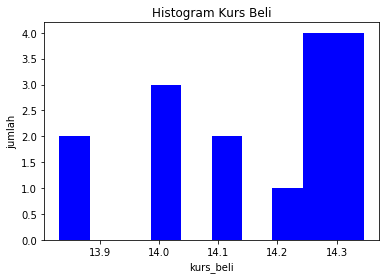

In [159]:
#histogram kurs beli
plt.xlabel('kurs_beli')
plt.ylabel('jumlah')
plt.title('Histogram Kurs Beli')
plt.hist(kurs['kurs_beli'], facecolor='blue')